In [1]:
from pathlib import Path
import itertools

import numpy as np
# https://matplotlib.org/gallery/lines_bars_and_markers/curve_error_band.html#sphx-glr-gallery-lines-bars-and-markers-curve-error-band-py
from scipy.interpolate import splprep, splev


import matplotlib.ticker as mticker
import matplotlib.patches as mpatches
import matplotlib.collections as mcollections
import matplotlib.colors as mcolors
import matplotlib.path as mpath
import matplotlib.pyplot as plt
from matplotlib import rcParams


import themepy
paper_path = Path('../paper/figures/')
slide_path = Path('../slides/figures/math/')
proposal_path = Path('../draft/figures/math/')
theme = themepy.Theme('paper')
rcParams['font.family'] = 'Segoe Print'
rcParams['figure.dpi'] = 200
%matplotlib inline

In [2]:
fc = '#F2EBDF'
ecolor = '#248EA6'
fcolor= '#F24B88'
kcolor = '#021859'
pcolor = 'darkgray'
tcolor = 'dimgray'
acolor = '#0099CC'

In [64]:
def scatter(ax, xpos, ypos, radius=.7, offset=1.5):
    
    s = ax.scatter(np.array(xpos)-offset, [ypos, ypos, ypos], color=kcolor)
    
    circles = [mpatches.Circle((x, ypos), radius=radius) for x in xpos]
    
    pc = mcollections.PatchCollection(circles, facecolor='C1', edgecolor=kcolor, zorder=4, lw=2)
    ax.add_collection(pc)
    
    text_kw = {'fontsize':12, 'ha':'center', 'va':'top'}
    ytext = .75
    
    for xp, slab in zip(xpos-offset, [r'$k_0$', r'$k_1$', r'$k_3$' ]):
        ax.text(xp, ytext, slab, **text_kw, transform=ax.transData, color=kcolor)
    
    for xp, slab in zip(xpos, [r'$S_0$', r'$S_1$', r'$S_3$' ]):
        ax.text(xp, ytext, slab, **text_kw, transform=ax.transData, color=kcolor)

    arrow = mpatches.FancyArrowPatch((xpos[0]-.7, ypos), (xpos[-1]-offset+.3, ypos), 
                                 arrowstyle='-|>', mutation_scale=25, color=acolor)
    ax.add_patch(arrow)
    ax.text(xpos[-1]-offset*.6, ypos, r'$\xi$', fontsize=16, ha='center', va='center',
            bbox={'color':'white', 'pad':.03}, color=acolor)

In [95]:
def line(ax, xpos, ypos, h=.3, offset=1.5, lw=2):
    x1, x2 = np.array(xpos)-offset
    xoff = [x1+h/2, x2-h/2]
    l, = ax.plot(xoff,[ypos, ypos], lw=lw, color=kcolor)
    width=(xpos[-1]-xpos[0])
    b1 = mpatches.Rectangle((xpos[0], ypos-h/2), height=h, width=width,facecolor='C1', edgecolor=kcolor, lw=2)
    ax.add_patch(b1)
    x = np.linspace(-2*np.pi, np.pi*2, 1000)
    inds = ((x>xpos[0]) & (x<xpos[-1]))
    y = np.sin(x*20)*.07 + .7
    
    arrow = mpatches.FancyArrowPatch((xpos[0]-.2, ypos), (xpos[-1]-offset-h/2 + .3, ypos), 
                               arrowstyle='-|>', mutation_scale=25, color=acolor)
    ax.add_patch(arrow)
    ax.text(xpos[-1]-offset*.6-h/2, ypos, r'$\xi$', fontsize=16, ha='center', va='center',
            bbox={'color':'white', 'pad':.03}, color=acolor)
    text_kw = {'fontsize':12, 'ha':'center', 'va':'top'}
    ytext = .75
    ax.text(xpos[0]-offset + width/2, ytext, r'$K$', **text_kw, transform=ax.transData, color=kcolor)
    ax.text(xpos[0]+width/2, ytext, r'$S$', **text_kw, transform=ax.transData, color=kcolor)

In [98]:
def image(ax, center, width, offset, r=.75):
    xpos = center[0]-width/2
    ypos = center[1]-width/2
    kwidth = .15
    s1 = mpatches.Rectangle((xpos-offset+r/2, ypos+(width*r)/2 - r), width*r, width*r, color=kcolor)
    ax.add_patch(s1)
    s2 = mpatches.Rectangle((xpos, ypos), width, width,facecolor='C1', edgecolor=kcolor, lw=2)
    ax.add_patch(s2)

    arrow = mpatches.FancyArrowPatch((center[0]-width/2-.2, center[1]), 
                                     (center[0]-offset+width/2-2*kwidth + .2, center[1]), 
                                     arrowstyle='-|>', mutation_scale=25, color=acolor)
    ax.add_patch(arrow)
    ax.text(center[0]+width/2-kwidth*2-offset*.62, center[1], r'$\xi$', fontsize=16, ha='center', va='center',
            bbox={'color':'white', 'pad':.03}, color=acolor)
    text_kw = {'fontsize':12, 'ha':'center', 'va':'top'}
    ytext = .7
    ax.text(center[0]-offset, ytext, r'$K$', **text_kw, transform=ax.transData, color=kcolor)
    ax.text(center[0], ytext, r'$S$', **text_kw, transform=ax.transData, color=kcolor)

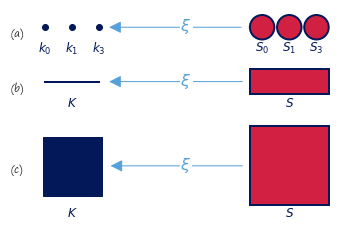

In [99]:
#paper_figure
fig, axd = plt.subplot_mosaic([['circle'], ['line'], ['image'],['image']], figsize=(8,4), 
                                  gridspec_kw={'wspace':0, 'hspace':-0})

r = .45
xpos = np.array([.5, 1.5, 2.5])+8.75
ypos = 1.25
offset = 8
scatter(axd['circle'], xpos, ypos, r, offset=offset)
line(axd['line'], [xpos[0]-r, xpos[-1]+r], ypos, h=r*2, offset=offset)
width = (xpos[-1] - xpos[0]) + r*2
image(axd['image'],[xpos[0]-r+width/2, ypos+r*2], width, offset, r=.75)

for k in axd.keys():
    axd[k].set_aspect("equal")
    axd[k].set(xticks=[], yticks=[])
    axd[k].set_facecolor("white")
    #axd[k].axis('off')
    axd[k].spines[:].set_color('white')
    
for name, l, y in [('circle', 'a', 1), ('line', 'b', 1), ('image', 'c', 2)]:
    axd[name].text(0, y, f'({l})', va='center', ha='left', fontsize='medium')
    
axd['circle'].set(xlim=(0,12), ylim=(0,2))
axd['line'].set(xlim=(0,12), ylim=(0, 2))
axd['image'].set(xlim=(0,12), ylim=(0,4))
fig.savefig(proposal_path/"retraction_maps.png", bbox_inches='tight', facecolor='white' )

In [100]:
N = 400
t = np.linspace(0, 2 * np.pi, N)
r = (0.5 + np.cos(t))
x, y = r * np.cos(t), r * np.sin(t)

err = 0.05 * np.sin(2 * t) ** 2 + 0.04 + 0.02 * np.cos(9 * t + 2)

# calculate normals via derivatives of splines
tck, u = splprep([x, y], s=0)
dx, dy = splev(u, tck, der=1)
l = np.hypot(dx, dy)
nx = dy / l
ny = -dx / l

# end points of errors
xp = x + nx * err
yp = y + ny * err
xn = x - nx * err
yn = y - ny * err

vertices = np.block([[xp, xn[::-1]],
                     [yp, yn[::-1]]]).T
codes = mpath.Path.LINETO * np.ones(len(vertices), dtype=mpath.Path.code_type)
codes[0] = codes[len(xp)] = mpath.Path.MOVETO


In [101]:
vertices[-3:]

array([[1.47167660e+00, 4.57955956e-02],
       [1.47045883e+00, 2.28506787e-02],
       [1.46832294e+00, 9.29462985e-08]])

In [102]:
def draw_brace(ax, xspan, yy, color='k', lw=1, reflect=True):
    """Draws an annotated brace on the axes."""
    xmin, xmax = xspan
    xspan = xmax - xmin
    ax_xmin, ax_xmax = ax.get_xlim()
    xax_span = ax_xmax - ax_xmin

    ymin, ymax = ax.get_ylim()
    yspan = ymax - ymin
    resolution = int(xspan/xax_span*100)*2+1 # guaranteed uneven
    beta = 300./xax_span # the higher this is, the smaller the radius

    x = np.linspace(xmin, xmax, resolution)
    if reflect:
        x=x*-1
    x_half = x[:int(resolution/2)+1]
    y_half_brace = (1/(1.+np.exp(-beta*(x_half-x_half[0])))
                    + 1/(1.+np.exp(-beta*(x_half-x_half[-1]))))
    y = np.concatenate((y_half_brace, y_half_brace[-2::-1]))
    y = yy + (.05*y - .01)*yspan # adjust vertical position
    if reflect:
        x = x*-1
    ax.autoscale(False)
    ax.plot(x, y, color=color, lw=lw, zorder=100)
    

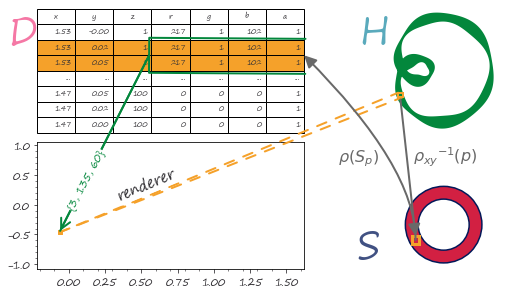

In [103]:
black = (0,0,0)
face_r =  (217,1,102)
face_h = mcolors.to_rgba('C2')
edge_r = black
edge_h = None
alpha=1
ffs = 16
face_h_label = "{3, 135, 60}"
acolor = '#56A1DA'

sub = 3
columns = ['x', 'y', 'z', 'r', 'g', 'b', 'a']
band = [(f'{xi:.2f}', f'{yi:.2f}', 1, face_r[0], face_r[1], face_r[2], alpha) for xi,yi in vertices[:sub]] 
line = [(f'{xi:.2f}', f'{yi:.2f}', 100, edge_r[0], edge_r[1], edge_r[2], alpha) for xi, yi in vertices[-sub:]]
middle = ['...' for _ in range(7)]
r7 = np.vstack([band, middle, line])
row = 2

rcolor = '#55C9F2'
rcolor = '#F5A12A'
fig, axd = plt.subplot_mosaic([['bundle', 'ideal'], ['screen', 'simplex']], 
                              constrained_layout=True, figsize=(8,4))
tab = axd['bundle'].table(r7,colLabels=columns, loc='center', fontsize=12 )
axd['bundle'].axis('off')

fx, fy = (0.25, 0.2)
radius = .3
rsw = .06
cx, cy = .5, .35
circle = mpatches.Circle((cx,cy), radius, facecolor='C1', edgecolor=kcolor, alpha=1, lw=1.5)
axd['simplex'].add_patch(circle)
hole = mpatches.Circle((cx,cy), radius-.1, facecolor='white', edgecolor=kcolor, alpha=1, lw=1.5)
axd['simplex'].add_patch(hole)
rect_simplex = mpatches.Rectangle((fx, fy), rsw, rsw, facecolor='none', edgecolor=rcolor, linewidth=3, zorder=110)
axd['simplex'].add_patch(rect_simplex)
axd['simplex'].set(aspect='equal', xlim=(0,1), ylim=(0,1))
axd['simplex'].axis('off')

rxy = (-0.06,-.46)
riw = .075
path = mpath.Path(vertices, codes)
patch = mpatches.PathPatch(path, facecolor=face_h, edgecolor='none', alpha=1)
axd['ideal'].add_patch(patch)

axd['ideal'].plot(x, y, color='none', alpha=.75)
axd['ideal'].set(aspect='equal')
axd['ideal'].axis('off')
rect_ideal = mpatches.Rectangle(rxy, riw, riw, facecolor='none', edgecolor=rcolor, linewidth=2, zorder=110)
axd['ideal'].add_patch(rect_ideal)

axd['screen'].set_facecolor('white')
axd['screen'].plot(x, y, color=axd['screen'].get_facecolor())
axd['screen'].scatter(rxy[0], rxy[1], color=rcolor, marker='s', s=10)
path = mpath.Path(vertices, codes)
patch = mpatches.PathPatch(path, facecolor='none', edgecolor='none')
axd['screen'].add_patch(patch)


axd['screen'].set(aspect='auto')
axd['screen'].xaxis.set_minor_locator(mticker.MultipleLocator(.1))
axd['screen'].yaxis.set_minor_locator(mticker.MultipleLocator(.1))
#axd['screen'].grid(which='minor')

asize=2
ms=25

#render arrow
screen_ideal_1 = mpatches.ConnectionPatch(xyA= rxy, coordsA=axd['screen'].transData,
                                        xyB=(rxy[0],rxy[1]+riw), coordsB=axd['ideal'].transData, linestyle=(1,(5,5)),
                                        color=rcolor, linewidth=asize, mutation_scale=ms)
fig.add_artist(screen_ideal_1)
screen_ideal_2 = mpatches.ConnectionPatch(xyA= rxy, coordsA=axd['screen'].transData,
                                        xyB=(rxy[0]+riw,rxy[1]), coordsB=axd['ideal'].transData, linestyle=(0,(5,5)),
                                        color=rcolor, linewidth=asize, mutation_scale=ms)
fig.add_artist(screen_ideal_2)

fig.text(.2, .32, 'renderer', rotation=40, 
         fontsize=14, rotation_mode='anchor', transform_rotates_text=True,
         bbox = {'facecolor':'white', 'edgecolor':'white','pad':.03})
# h->s
ideal_base = mpatches.ConnectionPatch(xyA=(rxy[0]+riw/2, rxy[1]-riw/2), coordsA=axd['ideal'].transData,
                         xyB=(fx+rsw/2, fy+rsw), coordsB=axd['simplex'].transData, arrowstyle='-|>',
                                       color=tcolor,linewidth=asize,mutation_scale=ms)
fig.add_artist(ideal_base)
fig.text(.71,.45, r"${\rho_{xy}}^{-1}(p)$", 
        fontsize=ffs, color=tcolor, bbox = {'facecolor':'white', 'edgecolor':'white','pad':.03})
# s-> d
ty = .62
tx = .42
base_fiber = mpatches.ConnectionPatch(xyA=(fx+rsw/2,fy+rsw/2), coordsA=axd['simplex'].transData,
                         xyB=(1, ty), coordsB=axd['bundle'].transData, connectionstyle='angle3, angleB=-45',
                         arrowstyle="-|>", color=tcolor, linewidth=asize,mutation_scale=ms)
fig.add_artist(base_fiber)


xspan = [.42,.86]
fig.text(.58, .45, r"$\rho(S_{p})$", 
         fontsize=ffs, color=tcolor, bbox = {'facecolor':'white', 'edgecolor':'white','pad':.03})
# s->screen
fiber_graphic = mpatches.ConnectionPatch(xyA=(tx,ty), coordsA=axd['bundle'].transData,
                         xyB=(rxy[0], rxy[1]+.02), coordsB=axd['screen'].transData, 
                                         arrowstyle=']-, angleA=-63.5, widthA=.7,lengthA=6.25', 
                                     color=face_h, linewidth=asize, mutation_scale=ms)
                                         
fig.add_artist(fiber_graphic)

fiber_graphic_arrow = mpatches.ConnectionPatch(xyA=(tx,ty), coordsA=axd['bundle'].transData,
                         xyB=(rxy[0], rxy[1]+.02), coordsB=axd['screen'].transData, 
                                         arrowstyle='->', color=face_h, linewidth=asize, mutation_scale=ms)
                                         
fig.add_artist(fiber_graphic_arrow)

for i in [2,3]:
    for j in range(7):
        tab[(i,j)].set_color(rcolor)
        tab[(i,j)].set_edgecolor('k')
fig.text(.12, .28, face_h_label, rotation=75, fontsize=10, color=face_h,  
         rotation_mode='anchor', transform_rotates_text=True,
         bbox = {'facecolor':axd['screen'].get_facecolor(), 'edgecolor':axd['screen'].get_facecolor(),'pad':.03})


axd['bundle'].text(0, 0.95, 'D', fontsize=36, transform=axd['bundle'].transAxes, va='top', ha='right', alpha=.75, color=fcolor)
axd['ideal'].text(0, 0.95, 'H', fontsize=36, transform=axd['ideal'].transAxes, va='top', ha='right', alpha=.75, color=ecolor)
axd['simplex'].text(0, 0, 'S', fontsize=36, transform=axd['simplex'].transAxes, va='bottom', ha='right', alpha=.75, color=kcolor)

fig.savefig(proposal_path/"render.png", bbox_inches='tight', facecolor='white')